# 10 Nov 22 - 2D FFT example

/var/folders/kt/kbbrlvm112n_mkbr68t8bv480000gn/T/ipykernel_3437/3730194501.py:4: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  im = plt.imread('https://raw.githubusercontent.com/dannycab/phy415msu/main/MMIPbook/assets/data/FFT/moonlanding.png').astype(float)


Text(0.5, 1.0, 'Original image')

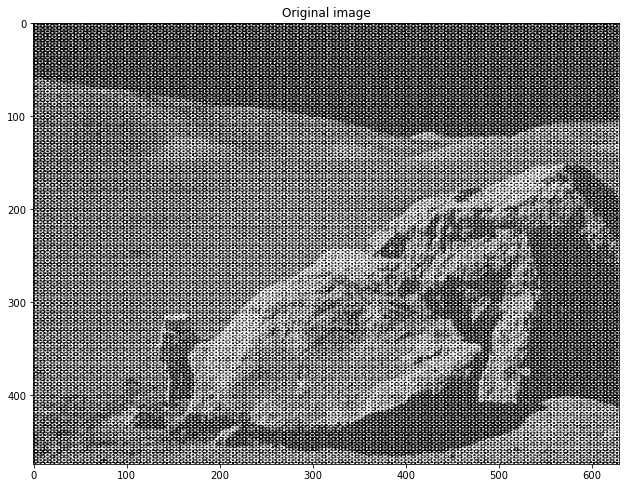

In [1]:
import numpy as np
import matplotlib.pyplot as plt

im = plt.imread('https://raw.githubusercontent.com/dannycab/phy415msu/main/MMIPbook/assets/data/FFT/moonlanding.png').astype(float)

plt.figure(figsize=(10.5,9.5))
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

Text(0.5, 1.0, 'Fourier transform')

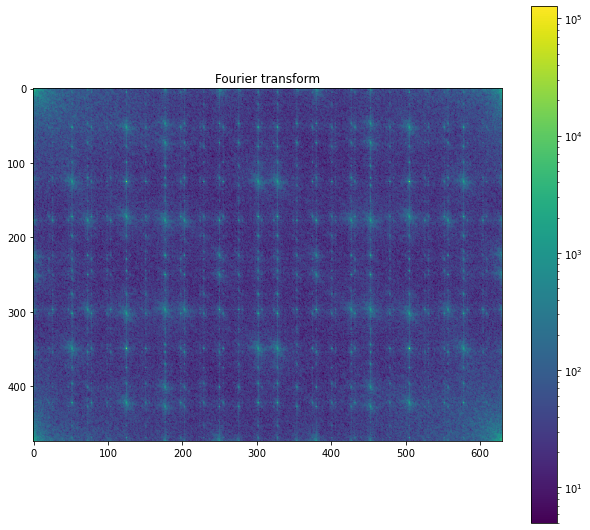

In [2]:
from scipy import fftpack
im_fft = fftpack.fft2(im)

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure(figsize=(10.5,9.5))
plot_spectrum(im_fft)
plt.title('Fourier transform')

Text(0.5, 1.0, 'Filtered Spectrum')

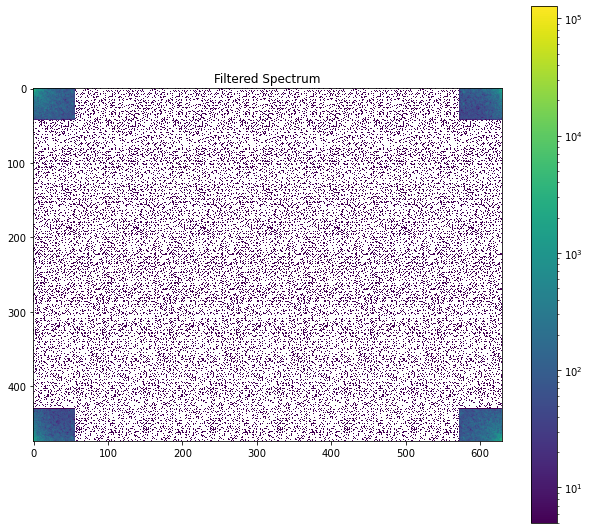

In [3]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.09

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure(figsize=(10.5,9.5))
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

Text(0.5, 1.0, 'Reconstructed Image')

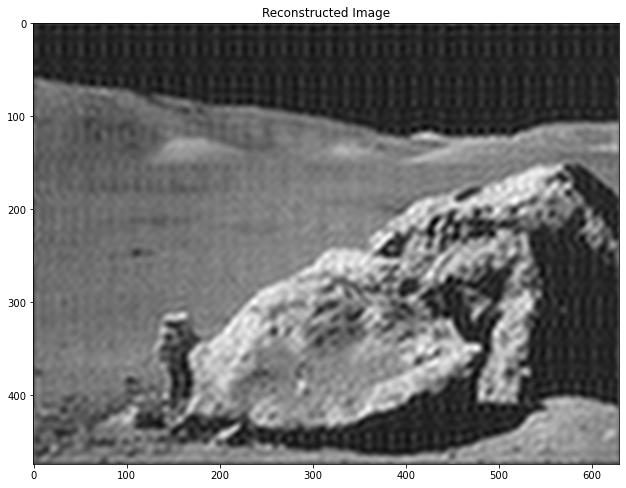

In [4]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure(figsize=(10.5,9.5))
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

Text(0.5, 1.0, 'Image Differences')

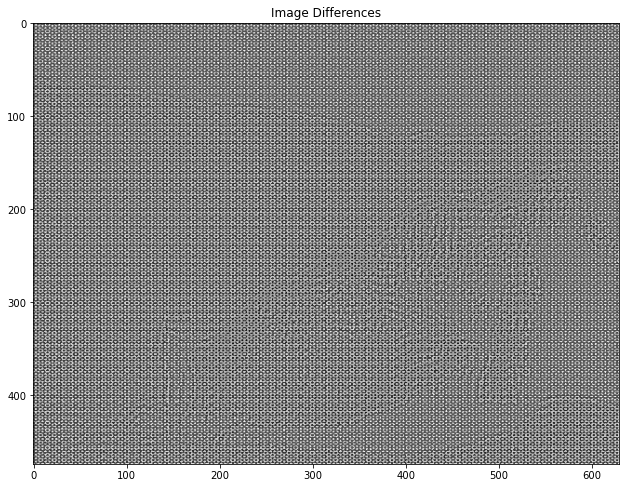

In [5]:
plt.figure(figsize=(10.5,9.5))
plt.imshow(im-im_new, plt.cm.gray)
plt.title('Image Differences')